In [1]:
# count the number of files in kaggle-data/train

import os
import pandas as pd

train_dir = 'kaggle-data/train'
test_dir = 'kaggle-data/test'

train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

print('Number of train files:', len(train_files))
print('Number of test files:', len(test_files))

Number of train files: 7033
Number of test files: 1


Each file has size of 512x512.

# Reading the polygons

In [13]:
import json

labels_file = 'kaggle-data/polygons.jsonl'

with open(labels_file, 'r') as json_file:
    json_labels = [json.loads(line) for line in json_file]

In [15]:
len(json_labels)

1633

In [5]:
json_labels[:1]

[{'id': '0006ff2aa7cd',
  'annotations': [{'type': 'glomerulus',
    'coordinates': [[[167, 249],
      [166, 249],
      [165, 249],
      [164, 249],
      [163, 249],
      [162, 249],
      [161, 249],
      [160, 249],
      [159, 249],
      [158, 249],
      [157, 249],
      [156, 249],
      [155, 249],
      [154, 249],
      [153, 249],
      [152, 249],
      [151, 249],
      [150, 249],
      [149, 249],
      [148, 249],
      [147, 249],
      [146, 249],
      [145, 249],
      [144, 249],
      [143, 249],
      [142, 249],
      [141, 249],
      [140, 249],
      [139, 249],
      [138, 249],
      [137, 249],
      [136, 249],
      [135, 249],
      [134, 249],
      [133, 249],
      [132, 249],
      [131, 249],
      [130, 249],
      [129, 249],
      [128, 249],
      [127, 249],
      [126, 249],
      [125, 249],
      [124, 249],
      [123, 249],
      [122, 249],
      [122, 248],
      [121, 248],
      [120, 248],
      [119, 248],
      [118, 248],
  

In [7]:
import numpy as np


idx = 0

def get_mask(idx):

    mask = np.zeros((512, 512), dtype=np.float32)

    for annot in json_labels[idx]['annotations']:

        cords = annot['coordinates']
        
        if annot['type'] == "blood_vessel":
            
            for cord in cords:
                
                rr, cc = np.array([i[1] for i in cord]), np.asarray([i[0] for i in cord])
                
                mask[rr, cc] = 1
    return mask


In [8]:
%timeit get_mask(idx=0) # 122 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

122 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


ok this is quite fast, niice.

# Visualize the data

(512, 512, 3) uint8 0 255


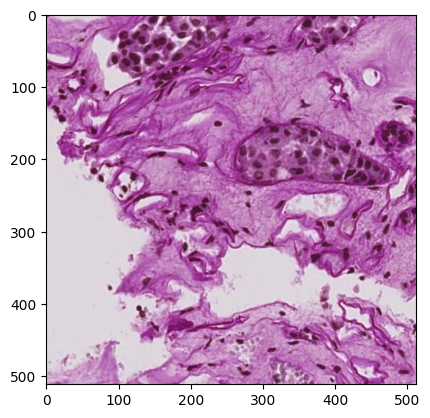

In [11]:
import matplotlib.pyplot as plt
import cv2

sample_image = cv2.imread("kaggle-data/test/72e40acccadf.tif")
print(sample_image.shape, sample_image.dtype, sample_image.min(), sample_image.max())

plt.imshow(sample_image)